In [2]:
import sys, os
sys.path.append(os.path.join(os.getcwd(), '..'))
sys.path.append(os.path.join(os.getcwd(), '..', '..'))
sys.path.append(os.path.join(os.getcwd(), '..', '..', '..', 'pplSIT', 'workflow', 'utils'))

In [3]:
%matplotlib inline

import itertools
from session.sessions import selected_009266, selected_008229, selected_009265
from imports import *
from scipy import stats
from scipy import signal
from Behavior.behavior import get_extent, get_idxs_behav_state, get_idxs_in_patches
from Behavior.behavior import density_map, density_map, get_idxs_neuro_state
from matplotlib.lines import Line2D
from population import unit_response_matrix, activity_at_phase

In [4]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [18]:
source = '/home/sobolev/nevermind_ag-grothe/AG_Pecka/data/processed/'
source = '/home/sobolev/nevermind/AG_Pecka/data/processed/'

# 009266
# sessions = [s for s in selected_009266.keys()]
# sessions.sort()
# selected = sessions[:]


# 009265
# sessions = [s for s in selected_009265.keys()]
# sessions.sort()
# selected = sessions[:]
# selected.remove('009265_hippoSIT_2023-02-27_10-18-32')
# selected.remove('009265_hippoSIT_2023-02-27_15-33-46')
# selected = selected[7:-1]


# animal 57
# selected = [
#     "57_SIT_2023-12-21_15-05-52",
#     "57_SIT_2023-12-22_14-08-07",
#     "57_SIT_2023-12-22_17-37-18",
#     "57_SIT_2023-12-28_16-43-28",
#     "57_SIT_2023-12-29_11-06-26",
#     "57_SIT_2023-12-29_11-40-14",
#     "57_SIT_2024-01-02_16-38-05",
#     "57_SIT_2024-01-02_17-10-09",
#     "57_SIT_2024-01-03_19-54-59",
# ]

# all 57
selected = [
    "57_SIT_2023-12-18_14-07-34",
    "57_SIT_2023-12-19_14-15-26",
    "57_SIT_2023-12-22_14-08-07",
    "57_SIT_2023-12-22_14-43-58",
    "57_SIT_2023-12-22_17-37-18",
    "57_SIT_2023-12-23_14-21-01",
    "57_SIT_2023-12-28_16-43-28",
    "57_SIT_2023-12-29_11-06-26",
    "57_SIT_2023-12-29_11-40-14",
    "57_SIT_2023-12-29_12-11-46",
    "57_SIT_2024-01-02_14-43-18",
    "57_SIT_2024-01-02_16-38-05",
    "57_SIT_2024-01-02_17-10-09",
    "57_SIT_2024-01-03_19-22-18",
    "57_SIT_2024-01-03_19-54-59",
    "57_SIT_2024-01-04_14-16-22",
    "57_SIT_2024-01-04_14-52-59",
    "57_SIT_2024-01-05_14-35-49",
    "57_SIT_2024-01-05_15-08-34",
    "57_SIT_2024-01-06_16-52-40",
    "57_SIT_2024-01-06_17-25-35",
    "57_SIT_2024-01-07_19-23-28",
    "57_SIT_2024-01-08_15-51-26",
    "57_SIT_2024-01-12_13-23-02",
    "57_SIT_2024-01-15_13-45-22",
    "57_SIT_2024-01-15_14-34-48"
]

# showcase
# selected = [
#     '009266_hippoSIT_2023-05-04_19-47-15',
#     '009266_hippoSIT_2023-04-17_17-04-17',
#     '009266_hippoSIT_2023-05-23_09-18-05'
# ]
# selected = [
#     '009265_hippoSIT_2023-03-09_20-03-08',
#     '009265_hippoSIT_2023-03-05_11-52-17'
# ]

# showcase for Fig. 5
# selected = [
#     '009265_hippoSIT_2023-03-09_20-03-08',
#     '009266_hippoSIT_2023-04-17_17-04-17',
#     '009266_hippoSIT_2023-04-18_10-10-37',
#     '009266_hippoSIT_2023-04-20_08-57-39',
#     '009266_hippoSIT_2023-04-24_10-08-11',
#     '009266_hippoSIT_2023-04-26_08-20-17',
#     '009266_hippoSIT_2023-05-02_12-22-14',
#     '009266_hippoSIT_2023-05-04_19-47-15',
#     '009266_hippoSIT_2023-05-23_09-18-05',
#     '009265_hippoSIT_2023-03-03_09-37-07',
#     '009265_hippoSIT_2023-03-04_11-12-04',
#     '009265_hippoSIT_2023-03-05_11-52-17',
# ]

selected

['57_SIT_2023-12-18_14-07-34',
 '57_SIT_2023-12-19_14-15-26',
 '57_SIT_2023-12-22_14-08-07',
 '57_SIT_2023-12-22_14-43-58',
 '57_SIT_2023-12-22_17-37-18',
 '57_SIT_2023-12-23_14-21-01',
 '57_SIT_2023-12-28_16-43-28',
 '57_SIT_2023-12-29_11-06-26',
 '57_SIT_2023-12-29_11-40-14',
 '57_SIT_2023-12-29_12-11-46',
 '57_SIT_2024-01-02_14-43-18',
 '57_SIT_2024-01-02_16-38-05',
 '57_SIT_2024-01-02_17-10-09',
 '57_SIT_2024-01-03_19-22-18',
 '57_SIT_2024-01-03_19-54-59',
 '57_SIT_2024-01-04_14-16-22',
 '57_SIT_2024-01-04_14-52-59',
 '57_SIT_2024-01-05_14-35-49',
 '57_SIT_2024-01-05_15-08-34',
 '57_SIT_2024-01-06_16-52-40',
 '57_SIT_2024-01-06_17-25-35',
 '57_SIT_2024-01-07_19-23-28',
 '57_SIT_2024-01-08_15-51-26',
 '57_SIT_2024-01-12_13-23-02',
 '57_SIT_2024-01-15_13-45-22',
 '57_SIT_2024-01-15_14-34-48']

## Single session

In [10]:
session = selected[1]
session = '009266_hippoSIT_2023-05-04_19-47-15'
session

'009266_hippoSIT_2023-05-04_19-47-15'

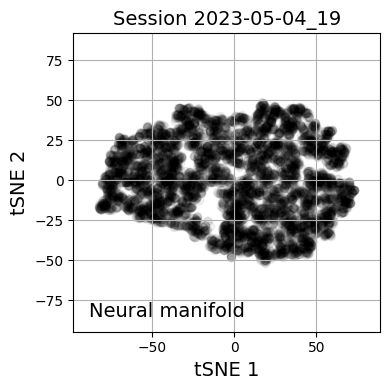

In [11]:
ft = 'tSNE'
fp = 70
animal = session.split('_')[0]
meta_file        = os.path.join(source, animal, session, 'meta.h5')
umap_file  = os.path.join(source, animal, session, 'analysis', 'W1-W4_tSNE_UMAP.h5')

with h5py.File(meta_file, 'r') as f:
    tl = np.array(f['processed']['timeline'])
    tgt_mx = np.array(f['processed']['target_matrix'])
with h5py.File(umap_file, 'r') as f:
    fit = np.array(f[ft][str(fp)])

extent = get_extent(fit, margin=10)
b_size = extent[1] - extent[0]

fig, ax = plt.subplots(1, 1, figsize=(4, 4))

ax.scatter(fit[:, 0], fit[:, 1], alpha=0.05, color='black')
ax.set_title('Session %s' % session[-19:-6], fontsize=14)
ax.set_xlim(extent[0], extent[1])
ax.set_ylim(extent[2], extent[3])
ax.set_xlabel('tSNE 1', fontsize=14)
ax.set_ylabel('tSNE 2', fontsize=14)
ax.grid()
ax.text(extent[0] + 0.05*b_size, extent[2] + 0.05*b_size, 'Neural manifold', fontsize=14)

fig.tight_layout()

## Plot UMAP tSNE for W1-W4 event space

In [7]:
def get_points_inside_paths(paths, all_points):
    all_in = None
    for c_path in paths:
        p_in = all_points[c_path.contains_points(all_points)]
        if all_in is None:
            all_in = p_in.copy()
        else:
            all_in = np.concatenate([all_in, p_in])
            
    return all_in

In [8]:
def intersect_2D(p_A, p_B):
    pA_set = set([tuple(x) for x in p_A])
    pB_set = set([tuple(x) for x in p_B])
    return np.array([x for x in pA_set & pB_set])
    
def union_2D(p_A, p_B):
    p_union = np.concatenate([p_A, p_B])
    return np.unique(p_union, axis=0)

def setdiff_2D(p_A, p_B):
    pA_set = set([tuple(x) for x in p_A])
    pB_set = set([tuple(x) for x in p_B])
    return np.array([x for x in pA_set.difference(pB_set)])

In [9]:
ft = 'tSNE'
fp = 70
#ft = 'UMAP'
#fp = '0.7'
speed_thresh = 0.04  # m/s
sound_state = 'BGR'
margin = 5
sigma = 0.3
bin_count = 100

In [19]:
# collect bE / bU stats for all sessions using watershed clusters
s_stats = {}
for j, session in enumerate(selected):
    animal = session.split('_')[0]

    s_path     = os.path.join(source, animal, session)
    meta_file  = os.path.join(source, animal, session, 'meta.h5')
    desc_file  = os.path.join(source, animal, session, 'descendants.h5')
    umap_file  = os.path.join(source, animal, session, 'analysis', 'W1-W4_tSNE_UMAP.h5')
    nMAP_seg_file = os.path.join(source, animal, session, 'analysis', 'nMAP_segmentation.h5')

    with h5py.File(meta_file, 'r') as f:
        tl = np.array(f['processed']['timeline'])
        tgt_mx = np.array(f['processed']['target_matrix'])
        events = np.array(f['processed']['sound_events'])
    with h5py.File(desc_file, 'r') as f:
        speed = np.array(f['speed'])
        hd    = np.array(f['hd'])
    with h5py.File(nMAP_seg_file, 'r') as f:
        d_map = np.array(f['density_map'])
        segmentation = np.array(f['segmentation'])
        segmentation_TGT_succ = np.array(f['segmentation_TGT_succ'])
        idxs_tgt_succ_state_ev = np.array(f['idxs_tgt_succ_state_ev'])
        tgt_stats = np.array(f['tgt_stats'])
        tgt_stats_shuf = np.array(f['tgt_stats_shuf'])
        
    # auditory state (BGR, SIL etc.) and speed filter
    idxs_sta_ev = np.where(speed[events[:, 2].astype(np.int32)] < speed_thresh)[0]  # define speed filter here
    idxs_bgr_ev = np.where(events[:, 1] == 1)[0]
    idxs_sil_ev = np.where(events[:, 1] == 0)[0]
    idxs_tgt_ev = np.where(events[:, 1] == 2)[0]
    idxs_noi_ev = np.where(events[:, 1] == -1)[0]
    idxs_tri_ev = np.where( (events[:, 1] == 1) | (events[:, 1] == 2) )[0]  # in the trial

    # final separation
    idxs_AL_bgr_ev  = np.intersect1d(idxs_tgt_succ_state_ev, idxs_bgr_ev)
    idxs_AL_tgt_ev  = np.intersect1d(idxs_tgt_succ_state_ev, idxs_tgt_ev)
    idxs_AL_sil_ev  = np.intersect1d(idxs_tgt_succ_state_ev, idxs_sil_ev)

    idxs_PH_ev = np.array([x for x in range(len(events)) if not x in idxs_tgt_succ_state_ev])
    idxs_PH_bgr_ev = np.intersect1d(idxs_PH_ev, idxs_bgr_ev)
    idxs_PH_sil_ev = np.intersect1d(idxs_PH_ev, idxs_sil_ev)

    idxs_AL_bgr_rest_ev = np.intersect1d(idxs_AL_bgr_ev, idxs_sta_ev)
    idxs_PH_bgr_rest_ev = np.intersect1d(idxs_PH_bgr_ev, idxs_sta_ev)
    idxs_AL_sil_rest_ev = np.intersect1d(idxs_AL_sil_ev, idxs_sta_ev)
    idxs_PH_sil_rest_ev = np.intersect1d(idxs_PH_sil_ev, idxs_sta_ev)

    s_stats[session] = {}
    s_stats[session]['AL_BGR'] = idxs_AL_bgr_rest_ev
    s_stats[session]['AL_SIL'] = idxs_AL_sil_rest_ev
    s_stats[session]['PH_BGR'] = idxs_PH_bgr_rest_ev
    s_stats[session]['PH_SIL'] = idxs_PH_sil_rest_ev

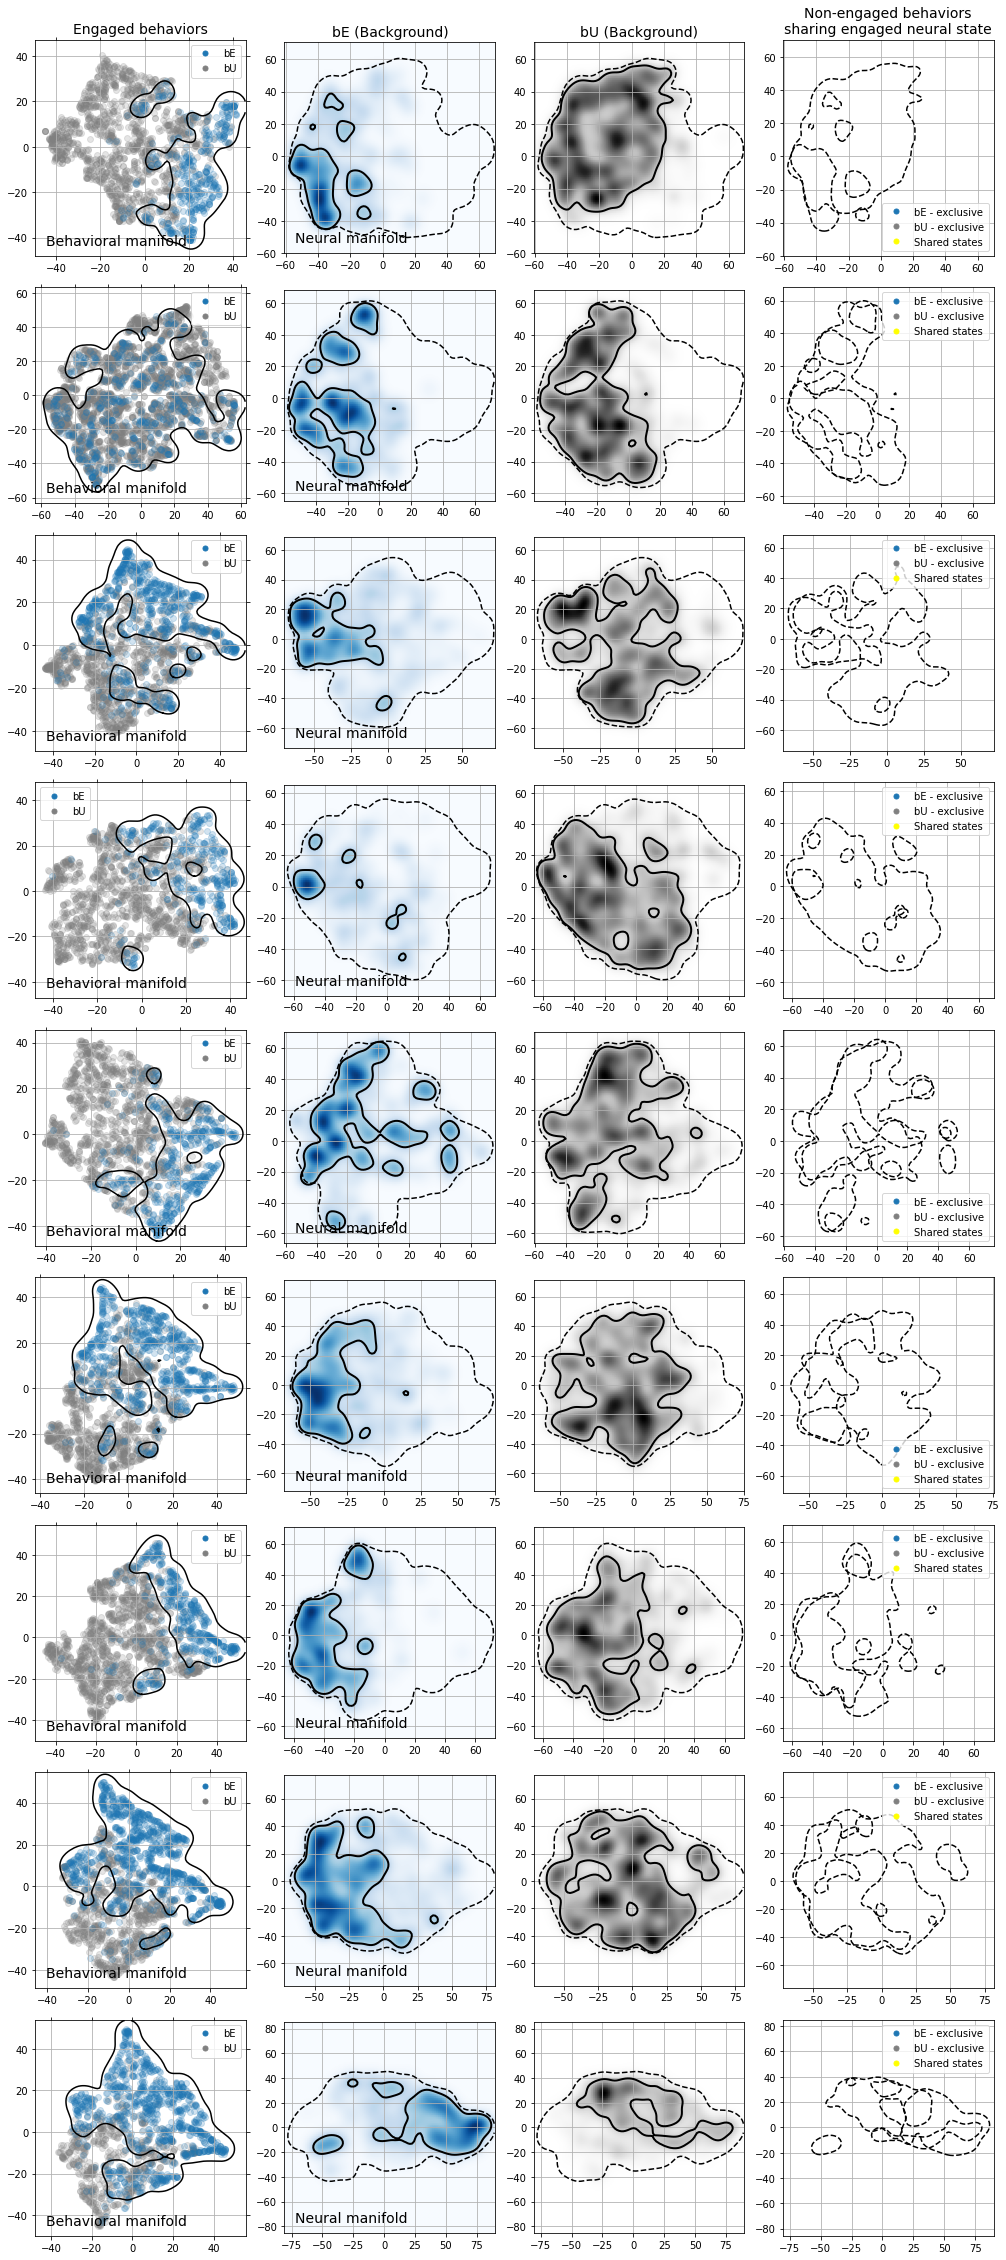

In [16]:
cols = 4
cmaps  = ['Blues', 'Greys', 'Greys', 'Greys']
fig, axes = plt.subplots(len(selected), cols, figsize=(cols*3.5, 3.5*len(selected)))

s_stats = {}
areas = np.zeros([len(selected), 4])  # bE, bU, overlap, all
for j, session in enumerate(selected):
    animal = session.split('_')[0]

    s_path     = os.path.join(source, animal, session)
    meta_file  = os.path.join(source, animal, session, 'meta.h5')
    desc_file  = os.path.join(source, animal, session, 'descendants.h5')
    umap_file  = os.path.join(source, animal, session, 'analysis', 'W1-W4_tSNE_UMAP.h5')
    state_file = os.path.join(source, animal, session, 'analysis', 'state_idxs.h5')
    moseq_class_file = os.path.join(source, animal, session, 'analysis', 'MoSeq_tSNE_UMAP.h5')

    with h5py.File(meta_file, 'r') as f:
        tl = np.array(f['processed']['timeline'])
        tgt_mx = np.array(f['processed']['target_matrix'])
        events = np.array(f['processed']['sound_events'])
    with h5py.File(umap_file, 'r') as f:
        fit = np.array(f[ft][str(fp)])
    with h5py.File(moseq_class_file, 'r') as f:
        idxs_srm_tl = np.array(f['idxs_srm_tl'])
        b_fit = np.array(f[ft][str(fp)])
    with h5py.File(desc_file, 'r') as f:
        speed = np.array(f['speed'])
        hd    = np.array(f['hd'])
    with h5py.File(state_file, 'r') as f:
        idxs_AL_ev = np.array(f['idxs_AL_ev'])  # bE state
        idxs_neuro_AL_bgr_ev = np.array(f['idxs_neuro_AL_bgr_ev'])
        idxs_neuro_AL_sil_ev = np.array(f['idxs_neuro_AL_sil_ev'])
        idxs_neuro_PH_bgr_ev = np.array(f['idxs_neuro_PH_bgr_ev'])
        idxs_neuro_PH_sil_ev = np.array(f['idxs_neuro_PH_sil_ev'])
        
    # auditory state (BGR, SIL etc.) and speed filter
    idxs_sta_ev = np.where(speed[events[:, 2].astype(np.int32)] < speed_thresh)[0]  # define speed filter here
    idxs_bgr_ev = np.where(events[:, 1] == 1)[0]
    idxs_sil_ev = np.where(events[:, 1] == 0)[0]
    idxs_tgt_ev = np.where(events[:, 1] == 2)[0]
    idxs_noi_ev = np.where(events[:, 1] == -1)[0]
    idxs_tri_ev = np.where( (events[:, 1] == 1) | (events[:, 1] == 2) )[0]  # in the trial
    
    # final separation
    idxs_AL_bgr_ev  = np.intersect1d(idxs_AL_ev, idxs_bgr_ev)
    idxs_AL_tgt_ev  = np.intersect1d(idxs_AL_ev, idxs_tgt_ev)
    idxs_AL_sil_ev  = np.intersect1d(idxs_AL_ev, idxs_sil_ev)

    idxs_PH_ev = np.array([x for x in range(len(events)) if not x in idxs_AL_ev])
    idxs_PH_bgr_ev = np.intersect1d(idxs_PH_ev, idxs_bgr_ev)
    idxs_PH_sil_ev = np.intersect1d(idxs_PH_ev, idxs_sil_ev)

    idxs_AL_bgr_rest_ev = np.intersect1d(idxs_AL_bgr_ev, idxs_sta_ev)
    idxs_PH_bgr_rest_ev = np.intersect1d(idxs_PH_bgr_ev, idxs_sta_ev)
    idxs_AL_sil_rest_ev = np.intersect1d(idxs_AL_sil_ev, idxs_sta_ev)
    idxs_PH_sil_rest_ev = np.intersect1d(idxs_PH_sil_ev, idxs_sta_ev)

    # ------- computing AL / PH from neural state - for cross-session stats
    idxs_neuro_AL_bgr_rest_ev = np.intersect1d(idxs_neuro_AL_bgr_ev, idxs_sta_ev)
    idxs_neuro_AL_sil_rest_ev = np.intersect1d(idxs_neuro_AL_sil_ev, idxs_sta_ev)

    # PH would be all not AL in BGR / TGT
    idxs_neuro_PH_bgr_rest_ev = np.intersect1d(idxs_neuro_PH_bgr_ev, idxs_sta_ev)
    idxs_neuro_PH_sil_rest_ev = np.intersect1d(idxs_neuro_PH_sil_ev, idxs_sta_ev)
    
    idxs_srm_bgr = np.where(tl[idxs_srm_tl][:, 6] == 1)[0]
    idxs_srm_sil = np.where(tl[idxs_srm_tl][:, 6] == 0)[0]
    
    idxs_AL_srm = np.unique(np.round(idxs_AL_ev/2).astype(np.int32))
    idxs_PH_srm = np.array([x for x in range(len(fit)) if not x in idxs_AL_srm])
    idxs_srm_bgr_bE = np.intersect1d(idxs_srm_bgr, idxs_AL_srm)
    idxs_srm_sil_bE = np.intersect1d(idxs_srm_sil, idxs_AL_srm)
    idxs_srm_bgr_bU = np.intersect1d(idxs_srm_bgr, idxs_PH_srm)
    idxs_srm_sil_bU = np.intersect1d(idxs_srm_sil, idxs_PH_srm)
    
    s_stats[session] = {}
    s_stats[session]['AL_BGR'] = idxs_AL_bgr_rest_ev
    s_stats[session]['AL_SIL'] = idxs_AL_sil_rest_ev
    s_stats[session]['PH_BGR'] = idxs_PH_bgr_rest_ev
    s_stats[session]['PH_SIL'] = idxs_PH_sil_rest_ev
    
    # ------- plotting -----------------
    
    # fit contours
    extent = get_extent(fit, margin=margin)
    b_size = extent[1] - extent[0]

    b_extent = get_extent(b_fit, margin=margin)
    bb_size = b_extent[1] - b_extent[0]
    idxs_bMAP = [idxs_srm_bgr_bE, idxs_srm_bgr_bU] if sound_state == 'BGR' else [idxs_srm_sil_bE, idxs_srm_sil_bU]

    # whole neural manifold
    d_map  = density_map(fit, extent, sigma=sigma, bin_count=100)
    levels = np.linspace(0.15*d_map.max(), d_map.max(), 2)
    CS_fit = axes[j][0].contour(d_map.T, levels, origin='lower', linewidths=2, extent=extent)
    
    # bE on bMAP contours
    d_map  = density_map(b_fit[idxs_bMAP[0]], b_extent, sigma=sigma, bin_count=100)
    levels = np.linspace(0.15*d_map.max(), d_map.max(), 2)
    CS_b_fit = axes[j][0].contour(d_map.T, levels, origin='lower', linewidths=2, extent=b_extent)
    
    axes[j][0].clear()

    # ----- first - bMAP with bE and bU
    
    ax = axes[j][0]
    ax.scatter(b_fit[idxs_bMAP[1]][:, 0], b_fit[idxs_bMAP[1]][:, 1], alpha=0.2, color='gray')
    ax.scatter(b_fit[idxs_bMAP[0]][:, 0], b_fit[idxs_bMAP[0]][:, 1], alpha=0.2, color='tab:blue')
    #ax.set_ylabel(session[-19:-6], fontsize=14)
    legend_elements = [
        Line2D([0], [0], marker='.', linestyle='None', color='tab:blue', markersize=10, label='bE'),
        Line2D([0], [0], marker='.', linestyle='None', color='gray', markersize=10, label='bU')
    ]
    ax.legend(handles=legend_elements)
    ax.text(b_extent[0] + 0.05*bb_size, b_extent[2] + 0.05*bb_size, 'Behavioral manifold', fontsize=14)
    ax.set_xlim(b_extent[0], b_extent[1])
    ax.set_ylim(b_extent[2], b_extent[3])
    ax.grid()
    for path in CS_b_fit.collections[0].get_paths():
    #for path in CS_b_fit.get_paths():
        verts = path.vertices
        ax.plot(verts[:,0], verts[:,1], color='black')
    
    # ------ other plots ---------
    
    idxs_state = [idxs_AL_bgr_rest_ev, idxs_PH_bgr_rest_ev] if sound_state == 'BGR' \
                    else [idxs_AL_sil_rest_ev, idxs_PH_sil_rest_ev]

    CS_all = []
    points_inside = []
    x_dim = np.linspace(extent[0], extent[1], bin_count)
    y_dim = np.linspace(extent[2], extent[3], bin_count)
    all_points = np.array([(x, y) for x, y in itertools.product(x_dim, y_dim)])
    
    for i, idxs in enumerate(idxs_state):
        ax = axes[j][i+1]
        s_map = density_map(fit[idxs], extent, sigma=sigma, bin_count=bin_count)
        levels = np.linspace(0.3*s_map.max(), s_map.max(), 2)
        ax.imshow(s_map.T, cmap=cmaps[i], origin='lower', extent=extent)
        CS = ax.contour(s_map.T, levels, colors=['black'], origin='lower', linewidths=2, extent=extent)
        
        # collect points inside
        points_inside.append(get_points_inside_paths(CS.collections[0].get_paths(), all_points))

        CS_all.append(CS)
        for path in CS_fit.collections[0].get_paths():
        #for path in CS_fit.get_paths():
            verts = path.vertices
            ax.plot(verts[:,0], verts[:,1], ls='--', color='black')
                
        if i == 0:
            #ax.set_ylabel(session[-19:-6], fontsize=14)
            ax.text(extent[0] + 0.05*b_size, extent[2] + 0.05*b_size, 'Neural manifold', fontsize=14)
        ax.set_xlim(extent[0], extent[1])
        ax.set_ylim(extent[2], extent[3])
        ax.grid()
        
    # compute overlaps
    points_bgr_intrs = intersect_2D(points_inside[0], points_inside[1])
    points_bgr_union = union_2D(points_inside[0], points_inside[1])
    points_bgr_bE_ex = setdiff_2D(points_inside[0], points_inside[1])
    points_bgr_bU_ex = setdiff_2D(points_inside[1], points_inside[0])
    
    for p, points in enumerate([points_bgr_bE_ex, points_bgr_bU_ex, points_bgr_intrs, points_bgr_union]):
        areas[j][p] = len(points)
    
    ax = axes[j][3]
    #ax.scatter(points_bgr_bE_ex[:, 0], points_bgr_bE_ex[:, 1], s=50, color='tab:blue', alpha=0.2)
    #ax.scatter(points_bgr_bU_ex[:, 0], points_bgr_bU_ex[:, 1], s=50, color='gray', alpha=0.2)
    #ax.scatter(points_bgr_intrs[:, 0], points_bgr_intrs[:, 1], s=50, color='yellow', alpha=0.2)
    ax.set_xlim(extent[0], extent[1])
    ax.set_ylim(extent[2], extent[3])
    ax.grid()
    for CS in CS_all:
        for path in CS.collections[0].get_paths():
        #for path in CS.get_paths():
            verts = path.vertices
            ax.plot(verts[:,0], verts[:,1], color='black', ls='--')
    legend_elements = [
        Line2D([0], [0], marker='.', linestyle='None', color='tab:blue', markersize=10, label='bE - exclusive'),
        Line2D([0], [0], marker='.', linestyle='None', color='gray', markersize=10, label='bU - exclusive'),
        Line2D([0], [0], marker='.', linestyle='None', color='yellow', markersize=10, label='Shared states'),
    ]
    ax.legend(handles=legend_elements, fontsize=10)

title = 'Background' if sound_state == 'BGR' else 'No stimulus'
axes[0][0].set_title('Engaged behaviors', fontsize=14)
axes[0][1].set_title('bE (%s)' % title, fontsize=14)
axes[0][2].set_title('bU (%s)' % title, fontsize=14)
axes[0][3].set_title('Non-engaged behaviors\nsharing engaged neural state', fontsize=14)
        
fig.tight_layout()

In [17]:
#fig.savefig(os.path.join(report, 'showroom', 'nMAP_bE_bU_%s_%s_SAMPLE.png' % (sound_state, animal)), dpi=500)
#fig.savefig(os.path.join(report, 'population', 'W1-W4_tSNE_AL_PH_%s_%s.pdf' % (sound_state, animal)))
fig.savefig(os.path.join(report, 'showroom', 'nMAP_bE_bU_%s_overlaps_ALL.png' % sound_state), dpi=300)

## Area stats

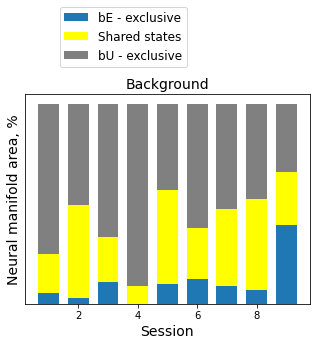

In [18]:
x_vals = np.arange(len(areas)) + 1

fig, ax = plt.subplots(1, 1, figsize=(4.5, 5))

title = 'Background' if sound_state == 'BGR' else 'No stimulus'
ex1 = areas[:, 0] / areas[:, 3]
ex2 = areas[:, 1] / areas[:, 3]
intrs = areas[:, 2] / areas[:, 3]
rects1 = ax.bar(x_vals, ex1, 0.7, label='bE - exclusive', color='tab:blue')
rects2 = ax.bar(x_vals, intrs, 0.7, bottom=ex1, label='Shared states', color='yellow')
rects2 = ax.bar(x_vals, ex2, 0.7, bottom=ex1 + intrs, label='bU - exclusive', color='gray')
ax.legend(bbox_to_anchor=(0.1, 1.1), fontsize=12)
ax.set_title(title, fontsize=14)
ax.set_xlabel('Session', fontsize=14)
ax.set_yticks([])
    
ax.set_ylabel('Neural manifold area, %', fontsize=14)
fig.tight_layout()

In [204]:
fig.savefig(os.path.join(report, 'showroom', 'nMAP_bE_bU_%s_overlap_cross_stats.png' % sound_state), dpi=300)

## Cross-session plot

In [20]:
s_deltas = {}
for j, session in enumerate(selected):
    animal = session.split('_')[0]
    s_path = os.path.join(source, animal, session)
    
    # Population activity
    w_mx = []
    for phase in [1, 2, 3, 4]:
        w_pca = activity_at_phase(s_path, phase, do_pca=True)
        w_mx.append(stats.zscore(w_pca)) # stay in events space
    w_mx = np.column_stack(w_mx)
    
    deltas_bgr, deltas_sil = [], []
    deltas_bgr_shuf, deltas_sil_shuf = {}, {}
    idxs_AL_bgr = s_stats[session]['AL_BGR']
    idxs_PH_bgr = s_stats[session]['PH_BGR']
    idxs_AL_sil = s_stats[session]['AL_SIL']
    idxs_PH_sil = s_stats[session]['PH_SIL']
    for i in range(4):
        # originals
        deltas_bgr.append(w_mx[idxs_AL_bgr][:, i].mean() - w_mx[idxs_PH_bgr][:, i].mean())
        deltas_sil.append(w_mx[idxs_AL_sil][:, i].mean() - w_mx[idxs_PH_sil][:, i].mean())
        
        # shuffle controls
        for k, idxs_pair in enumerate([(idxs_AL_bgr, idxs_PH_bgr), (idxs_AL_sil, idxs_PH_sil)]):
            deltas_shuf = []
            idxs_st_shuf = np.concatenate([idxs_pair[0], idxs_pair[1]])
            for z in range(100):
                np.random.shuffle(idxs_st_shuf)
                idxs_AL_st_shuf = idxs_st_shuf[:len(idxs_pair[0])]
                idxs_PH_st_shuf = idxs_st_shuf[-len(idxs_pair[1]):]
                deltas_shuf.append(w_mx[idxs_AL_st_shuf][:, i].mean() - w_mx[idxs_PH_st_shuf][:, i].mean())
            if k == 0:
                deltas_bgr_shuf[i] = np.array(deltas_shuf)
            else:
                deltas_sil_shuf[i] = np.array(deltas_shuf)

    s_deltas[session] = {}
    s_deltas[session]['BGR'] = deltas_bgr
    s_deltas[session]['SIL'] = deltas_sil
    s_deltas[session]['BGR_SHUF'] = deltas_bgr_shuf
    s_deltas[session]['SIL_SHUF'] = deltas_sil_shuf
    
    print(session)

57_SIT_2023-12-18_14-07-34
57_SIT_2023-12-19_14-15-26
57_SIT_2023-12-22_14-08-07
57_SIT_2023-12-22_14-43-58
57_SIT_2023-12-22_17-37-18
57_SIT_2023-12-23_14-21-01
57_SIT_2023-12-28_16-43-28
57_SIT_2023-12-29_11-06-26
57_SIT_2023-12-29_11-40-14
57_SIT_2023-12-29_12-11-46
57_SIT_2024-01-02_14-43-18
57_SIT_2024-01-02_16-38-05
57_SIT_2024-01-02_17-10-09
57_SIT_2024-01-03_19-22-18
57_SIT_2024-01-03_19-54-59
57_SIT_2024-01-04_14-16-22
57_SIT_2024-01-04_14-52-59
57_SIT_2024-01-05_14-35-49
57_SIT_2024-01-05_15-08-34
57_SIT_2024-01-06_16-52-40
57_SIT_2024-01-06_17-25-35


/tmp/ipykernel_1172187/1797607880.py:22: RuntimeWarning: Mean of empty slice.
  deltas_sil.append(w_mx[idxs_AL_sil][:, i].mean() - w_mx[idxs_PH_sil][:, i].mean())
/home/sobolev/projects/pySIT/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_1172187/1797607880.py:32: RuntimeWarning: Mean of empty slice.
  deltas_shuf.append(w_mx[idxs_AL_st_shuf][:, i].mean() - w_mx[idxs_PH_st_shuf][:, i].mean())


57_SIT_2024-01-07_19-23-28
57_SIT_2024-01-08_15-51-26
57_SIT_2024-01-12_13-23-02
57_SIT_2024-01-15_13-45-22
57_SIT_2024-01-15_14-34-48


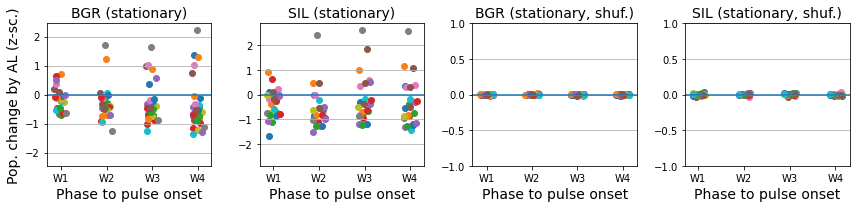

In [21]:
fig, axes = plt.subplots(1, 4, figsize=(12, 3))

titles = ['BGR (stationary)', 'SIL (stationary)', 'BGR (stationary, shuf.)', 'SIL (stationary, shuf.)']
for j, s_type in enumerate(['BGR', 'SIL', 'BGR_SHUF', 'SIL_SHUF']):
    ax = axes[j]
    v_max = 0
    for i, (session, deltas_all) in enumerate(s_deltas.items()):
        offset = (np.random.rand(1)[0] - 0.5)*0.3
        if j < 2:
            vals = deltas_all[s_type]
        else:
            vals = np.array([deltas_all[s_type][z].mean() for z in range(4)])
        ax.scatter(np.arange(4) + offset, vals, label=session[-19:-6])
        cv_max = np.abs(np.array(vals)).max()
        if cv_max > v_max:
            v_max = cv_max
    ax.axhline(0)
    ax.grid(axis='y')
    ax.set_ylim(-v_max*1.1, v_max*1.1)
    ax.set_title(titles[j], fontsize=14)
    ax.set_xticks(np.arange(4))
    ax.set_xticklabels(['W1', 'W2', 'W3', 'W4'])
    ax.set_xlabel('Phase to pulse onset', fontsize=14)
    if j > 1:
        ax.set_ylim(-1, 1)
    #if j == 2:
    #    ax.legend()
    
axes[0].set_ylabel('Pop. change by AL (z-sc.)', fontsize=14)
fig.tight_layout()

In [41]:
#fig.savefig(os.path.join(report, 'population', 'W1-W4_tSNE_AL_PH_%s_cross.pdf' % animal))
#fig.savefig(os.path.join(report, 'population', 'W1-W4_tSNE_AL_PH_%s_cross.png' % animal), dpi=500)

## Cross-animal plot

In [16]:
s_deltas_2 = dict(s_deltas)

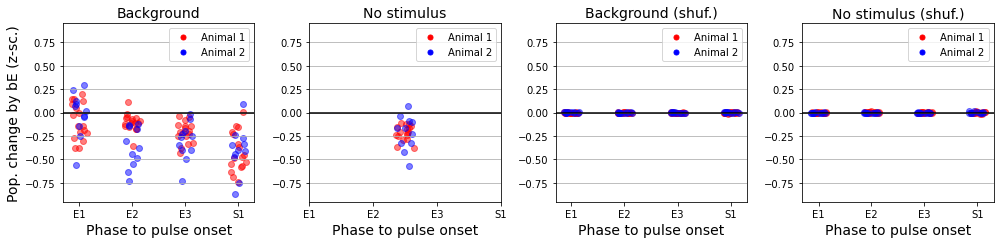

In [21]:
fig, axes = plt.subplots(1, 4, figsize=(14, 3.5))

labels = ['Animal 1', 'Animal 2']
colors = ['red', 'blue']
titles = ['Background', 'No stimulus', 'Background (shuf.)', 'No stimulus (shuf.)']

v_max = 0
label_set = 0
for j, s_type in enumerate(['BGR', 'SIL', 'BGR_SHUF', 'SIL_SHUF']):
#for j, s_type in enumerate(['BGR', 'BGR_SHUF']):
    ax = axes[j]
    for k, s_deltas_c in enumerate([s_deltas_1, s_deltas_2]):
        for i, (session, deltas_all) in enumerate(s_deltas_c.items()):
            offset = (np.random.rand(1)[0] - 0.5)*0.3
            x_vals = np.arange(4) + offset
            if j == 0:
                y_vals = deltas_all[s_type]
            elif j == 1:
                x_vals = 1.5 + offset
                y_vals = np.array(deltas_all[s_type]).mean()
            else:
                y_vals = np.array([deltas_all[s_type][z].mean() for z in range(4)])
            ax.scatter(x_vals, y_vals, color=colors[k], alpha=0.5)
            cv_max = np.abs(np.array(y_vals)).max()
            if cv_max > v_max:
                v_max = cv_max
    ax.axhline(0, color='black')
    ax.grid(axis='y')
    ax.set_title(titles[j], fontsize=14)
    ax.set_xticks(np.arange(4))
    ax.set_xticklabels(['E1', 'E2', 'E3', 'S1'])
    ax.set_xlabel('Phase to pulse onset', fontsize=14)
    if j> 1:
        ax.set_ylim(-1, 1)
        
legend_elements = [
    Line2D([0], [0], marker='.', linestyle='None', color='red', markersize=10, label='Animal 1'),
    Line2D([0], [0], marker='.', linestyle='None', color='blue', markersize=10, label='Animal 2')
]
for ax in axes:
    ax.set_ylim(-v_max*1.1, v_max*1.1)
    ax.legend(handles=legend_elements, loc='upper right')

axes[0].set_ylabel('Pop. change by bE (z-sc.)', fontsize=14)
fig.tight_layout()

In [22]:
fig.savefig(os.path.join(report, 'showroom', 'bE_bU_pop_change_cross.png'), dpi=300)

## Coherence of activity increase (decrease) across units -> hopefully confirming effect of attention 
    between conditions (compare effect b/w BGR/SIL for each unit, look at PSTH)

## Look separately for duration sessions - should the W3 be amplified?